<a href="https://colab.research.google.com/github/felixM2020/ACT_School_DA/blob/main/Buses_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Buses Data Analysis

References:


## Data Cleaning

In [50]:
import pandas as pd

buses = pd.read_csv('/content/drive/MyDrive/CSV/ACT_School_Bus_Services.csv')

buses.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   RouteNumber   511 non-null    int64 
 1   Shift         511 non-null    int64 
 2   StartTime     511 non-null    object
 3   VehicleStyle  511 non-null    object
 4   Description   511 non-null    object
 5   Address       511 non-null    object
 6   Phone         511 non-null    object
 7   School Name   511 non-null    object
 8   Website       511 non-null    object
 9   Location      511 non-null    object
dtypes: int64(2), object(8)
memory usage: 40.0+ KB


Drop unnessecary columns

In [51]:
buses = buses.drop(['Phone', 'Website', 'Location'], axis =1)

buses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   RouteNumber   511 non-null    int64 
 1   Shift         511 non-null    int64 
 2   StartTime     511 non-null    object
 3   VehicleStyle  511 non-null    object
 4   Description   511 non-null    object
 5   Address       511 non-null    object
 6   School Name   511 non-null    object
dtypes: int64(2), object(5)
memory usage: 28.1+ KB


#Transform Description Column

Explore Description

In [52]:
buses['Description']

0                       Forde, Bonner, Amaroo, Ngunnawal
1                               Gungahlin Place Non Stop
2                   Ngunnawal, Moncrieff, Amaroo, Bonner
3                              Bonner, Amaroo, Ngunnawal
4                               Gungahlin Place Non Stop
                             ...                        
506            Gordon, Banks, Conder, Lanyon Marketplace
507     Calwell, Richardson, Chisholm, Macarthur, Fadden
508    Denman Prospect, Wright, Coombs, Duffy, Stirli...
509                           Woden Interchange Non Stop
510                                     Ainslie, Hackett
Name: Description, Length: 511, dtype: object

Create and apply function to change description to an array of Suburbs.

In [53]:
non_valid_locs = ['Cooleman', 'Kippax']

def valid_loc(loc):
    return len(loc) > 4 and (loc not in non_valid_locs)

def non_stop_parse(route, out):
    place = route.strip().split(' ')[0]
    out.append(place)
    
def multiple_stop_parse(route,out):
    places = route.split(',')
    for place in places:
        place = place.strip()
        location = place.split(' ')[0]
        if valid_loc(location):
            out.append(location)

def parse_route(cell):
    out = []
    if 'Non Stop' in cell:
        non_stop_parse(cell, out)
    else:
        multiple_stop_parse(cell, out)
       
    return  out

buses['Route'] = buses['Description'].apply(lambda x : parse_route(x))

buses['Route']

0                     [Forde, Bonner, Amaroo, Ngunnawal]
1                                            [Gungahlin]
2                 [Ngunnawal, Moncrieff, Amaroo, Bonner]
3                            [Bonner, Amaroo, Ngunnawal]
4                                            [Gungahlin]
                             ...                        
506                      [Gordon, Banks, Conder, Lanyon]
507    [Calwell, Richardson, Chisholm, Macarthur, Fad...
508    [Denman, Wright, Coombs, Duffy, Stirling, Wara...
509                                              [Woden]
510                                   [Ainslie, Hackett]
Name: Route, Length: 511, dtype: object

###Clean Time

In [54]:
buses['StartTime']



0      7:53:00 AM
1      8:33:00 AM
2      7:23:00 AM
3      8:05:00 AM
4      3:44:00 PM
          ...    
506    3:10:00 PM
507    3:30:00 PM
508    3:20:00 PM
509    3:28:00 PM
510    3:11:00 PM
Name: StartTime, Length: 511, dtype: object

Transform start time to minutes from start of the day

In [55]:
def convert_time_minutes(time):
  time = time.strip()
  out = 0
  intervals = time.split(':')
  hours = intervals[0]
  out += (int(hours) * 60)
  minutes = intervals[1]
  out += int(minutes)

  if time[-2:] == 'PM':
    out += (60 * 12)

  return out

 

buses['StartTime'] = buses['StartTime'].apply(convert_time_minutes)
buses['StartTime']
    

0      473
1      513
2      443
3      485
4      944
      ... 
506    910
507    930
508    920
509    928
510    911
Name: StartTime, Length: 511, dtype: int64

##Join Schools Data With Buses
School data is non government school data

Open all school data files and find difference in columns

In [56]:
gov_college = pd.read_csv('/content/drive/MyDrive/CSV/Schools_Government_College.csv')
gov_primary = pd.read_csv('/content/drive/MyDrive/CSV/Schools_Government_Primary.csv')
gov_secondary = pd.read_csv('/content/drive/MyDrive/CSV/Schools_Government_Secondary.csv')
non_gov = pd.read_csv('/content/drive/MyDrive/CSV/Schools_Non_Government.csv')
gov_other = pd.read_csv('/content/drive/MyDrive/CSV/Schools_Other_Government_Schools.csv')
schools_list = [gov_college, gov_primary, gov_secondary, non_gov, gov_other]
out = {}
for s in schools_list:
  for col in s.columns:
    if col in out.keys():
      out[col] += 1
    else:
      out[col] = 1
print(out)

{'X': 5, 'Y': 5, 'GOVERNMENT': 5, 'TYPE': 5, 'PEA': 5, 'SECTION': 5, 'BLOCK': 5, 'STREET': 5, 'SUBURB': 5, 'STATE': 5, 'POSTCODE': 5, 'SCHOOLCODE': 5, 'DESCRIPTION': 5, 'WEBSITE': 5, 'EMAIL': 5, 'PHONE': 5, 'DATASET': 5, 'OBJECTID': 5, 'SCHOOL_NAME': 5, 'BLOCK_KEY': 5, 'DEEWR_SCHOOL_ID': 5, 'MY_SCHOOL_WEBSITE': 5, 'LEVEL_': 5, 'APPLY_NOW': 5, 'STATUS': 5, 'OBJECTID_1': 2}


Delete object_id1 columns

In [57]:
for s in schools_list:
  try:
    s = s.drop('OBJECTID_1')
  except:
    pass

Join all schools


In [58]:
schools = pd.concat(schools_list)

schools = schools[['SCHOOL_NAME', 'SUBURB', 'TYPE', 'X', 'Y', 'GOVERNMENT']]

schools['School Name'] = schools['SCHOOL_NAME']

schools = schools.drop('SCHOOL_NAME', axis = 1)

buses = buses.merge(schools, on = 'School Name', how = 'inner')

print(buses.head())

   RouteNumber  Shift  StartTime VehicleStyle  \
0         1001   1550        473         Euro   
1         1002   1041        513         IRIS   
2         1001   1358        485         Euro   
3         1002   1605        944         Euro   
4         1003   1412        945         Euro   

                                         Description  \
0                   Forde, Bonner, Amaroo, Ngunnawal   
1                           Gungahlin Place Non Stop   
2                          Bonner, Amaroo, Ngunnawal   
3                           Gungahlin Place Non Stop   
4  Gungahlin, Throsby, Harrison, Franklin, Palmer...   

                       Address              School Name  \
0  1021 Gungahlin Dr, Nicholls  St John Paul II College   
1  1021 Gungahlin Dr, Nicholls  St John Paul II College   
2  1021 Gungahlin Dr, Nicholls  St John Paul II College   
3  1021 Gungahlin Dr, Nicholls  St John Paul II College   
4  1021 Gungahlin Dr, Nicholls  St John Paul II College   

             

In [59]:
buses.columns

Index(['RouteNumber', 'Shift', 'StartTime', 'VehicleStyle', 'Description',
       'Address', 'School Name', 'Route', 'SUBURB', 'TYPE', 'X', 'Y',
       'GOVERNMENT'],
      dtype='object')

## Data Exploration

Explore Government vs Non Government Schools of vehicles styles




GOVERNMENT
No     336
Yes    151
dtype: int64


Text(1, 343, '336')

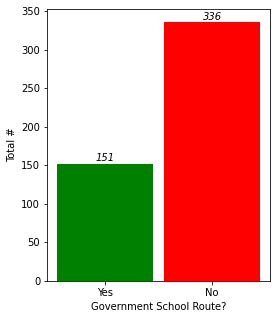

In [60]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

counts = buses.groupby(['GOVERNMENT']).size()
print(counts)
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (2, 5)
bus_bar = ax.bar( x= counts.index.sort_values(ascending = False), height = counts.sort_values(ascending = True).array,
                    color = ['g', 'r'], width = 0.9, linewidth = 0)
plt.xlabel('Government School Route?')
plt.ylabel('Total #')
plt.text(0,160,'151', horizontalalignment='center',    verticalalignment='center', style = 'italic')
plt.text(1,343,'336', horizontalalignment='center',    verticalalignment='center', style = 'italic')




/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


[]

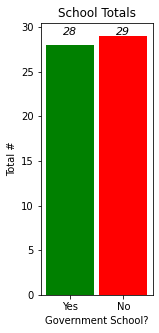

In [61]:
school_info = buses[['School Name', 'GOVERNMENT']]
school_info.drop_duplicates(keep = 'first', inplace = True)

school_amounts = school_info.groupby(['GOVERNMENT']).size()
school_amounts.sort_values( axis = 0, ascending = True, inplace = True)

fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (4, 5)

ax.bar( x = school_amounts.index.sort_values( ascending = False),
       height = school_amounts.array,
       color = ['g', 'r'], width = 0.9)

ax.text(1,29.5,'29', fontsize = 11, style = 'italic',horizontalalignment='center',    verticalalignment='center')
ax.text(0, 29.5, '28', fontsize = 11, style = 'italic', horizontalalignment='center',    verticalalignment='center')
plt.xlabel('Government School?')
plt.ylabel('Total #')
plt.title('School Totals')
plt.plot()


Look at most visited schools

Transform buses data for analysis

In [62]:
top_schools = buses.groupby(['School Name']).size().sort_values(ascending = False)[:25]
top_schools = pd.DataFrame(top_schools, columns = [ 'Bus Routes'])

top_schools_df = schools.merge(top_schools, on = 'School Name', how = 'inner').sort_values(by = 'Bus Routes', ascending = True)

Plot Data

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24],
 <a list of 25 Text major ticklabel objects>)

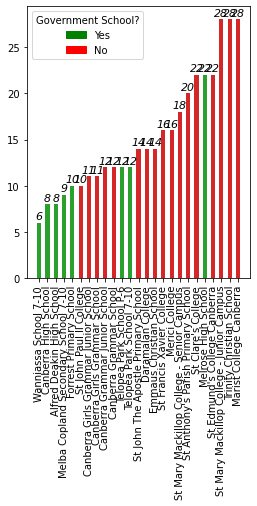

In [63]:
colours = {'Yes':'tab:green', 'No':'tab:red'}
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (10, 9)
top_rides = ax.bar( x = top_schools_df['School Name'], height = top_schools_df['Bus Routes'], color = top_schools_df['GOVERNMENT'].map(colours), width = 0.5)
red_patch = mpatches.Patch(color='red', label='No')
green_patch = mpatches.Patch(color='green', label='Yes')
ax.legend(handles=[ green_patch, red_patch], title = 'Government School?')
for i, v in enumerate(top_schools_df['Bus Routes']):
  ax.text(i,v+0.7,str(v), fontsize = 11, style = 'italic',horizontalalignment='center',    verticalalignment='center')
plt.xticks(rotation = 90)

###Schools Distribution

Text(0.5, 1.0, 'Non Government School Types')

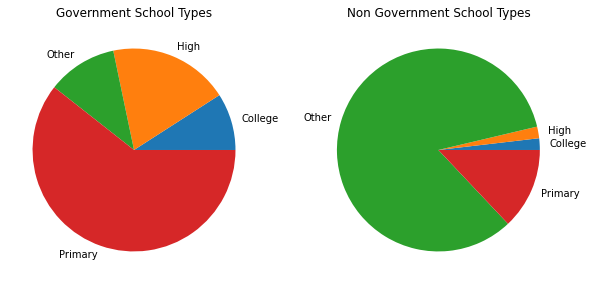

In [64]:
fig, (ax1, ax2) = plt.subplots(1,2)
gov = schools['GOVERNMENT'] == 'Yes'
non_gov = schools['GOVERNMENT'] == 'No'
count_gov_schools = schools[gov].groupby('TYPE').size()
count_non_gov_schools = schools[non_gov].groupby('TYPE').size()

pi1 = ax1.pie( x = count_gov_schools.array, labels = count_gov_schools.index)
pi2 = ax2.pie( x = count_non_gov_schools.array, labels = count_non_gov_schools.index)

ax1.set_title('Government School Types')
ax2.set_title('Non Government School Types')

Compare Times of Bus Riding

Text(0.5, 1.0, 'Non Government Bus Start Times')

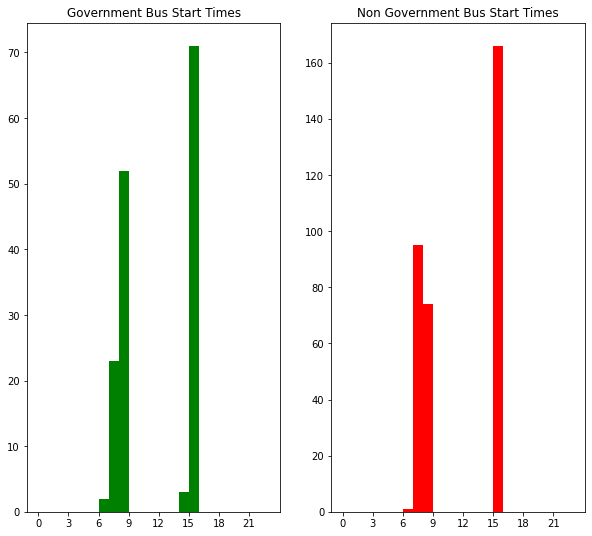

In [65]:
fig, (ax1, ax2) = plt.subplots(1,2)
plt.rcParams["figure.figsize"] = (10, 7)
gov = buses['GOVERNMENT'] == 'Yes'
non_gov = buses['GOVERNMENT'] == 'No'
bins = []
for i in range(24):
  bins.append(i * 60)
time_labels = []
for i in range(24):
  time_labels.append(i)
x_ticks = [0,3,6,9,12,15,18,21]
ax1.hist(x = buses[gov]['StartTime'], bins = bins, color = 'Green')
ax1.set_xticks([x*60 for x in x_ticks])
ax1.set_xticklabels(x_ticks)
ax1.set_title('Government Bus Start Times')
ax2.hist(x = buses[non_gov]['StartTime'], bins = bins, color = 'Red')
ax2.set_xticks([x*60 for x in x_ticks])
ax2.set_xticklabels(x_ticks)
ax2.set_title('Non Government Bus Start Times')



Look at primary schools

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 <a list of 16 Text major ticklabel objects>)

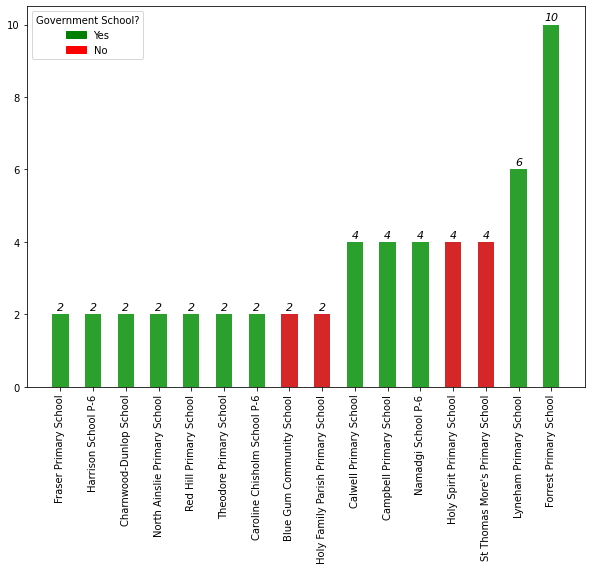

In [66]:
primary = buses[buses['TYPE'] == 'Primary'].groupby(['School Name']).size().sort_values(ascending = False)
primary = pd.DataFrame(primary,  columns = [ 'Bus Routes'])

primary_df = schools.merge(primary, on = 'School Name', how = 'inner').sort_values(by = 'Bus Routes', ascending = True)

colours = {'Yes':'tab:green', 'No':'tab:red'}
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (10, 9)
top_rides = ax.bar( x = primary_df['School Name'], height = primary_df['Bus Routes'], color = primary_df['GOVERNMENT'].map(colours), width = 0.5)
red_patch = mpatches.Patch(color='red', label='No')
green_patch = mpatches.Patch(color='green', label='Yes')
ax.legend(handles=[ green_patch, red_patch], title = 'Government School?')
for i, v in enumerate(primary_df['Bus Routes']):
  ax.text(i,v+0.2,str(v), fontsize = 11, style = 'italic',horizontalalignment='center',    verticalalignment='center')
plt.xticks(rotation = 90)


Create Model and Prepare Data for Learning

In [67]:
buses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 487 entries, 0 to 486
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   RouteNumber   487 non-null    int64  
 1   Shift         487 non-null    int64  
 2   StartTime     487 non-null    int64  
 3   VehicleStyle  487 non-null    object 
 4   Description   487 non-null    object 
 5   Address       487 non-null    object 
 6   School Name   487 non-null    object 
 7   Route         487 non-null    object 
 8   SUBURB        487 non-null    object 
 9   TYPE          487 non-null    object 
 10  X             487 non-null    float64
 11  Y             487 non-null    float64
 12  GOVERNMENT    487 non-null    object 
dtypes: float64(2), int64(3), object(8)
memory usage: 53.3+ KB


Transform Columns
(Categorical -> Numerical)

In [68]:
data = buses

route_suburbs = set()
for l in data['Route']:
  for suburb in l:
    route_suburbs.add(suburb)

for suburb in route_suburbs:
  f = lambda x: 1 if suburb in x else 0
  data['route_'+ suburb] = data['Route'].apply(lambda x: f(x))

for suburb in pd.unique(data['SUBURB']):
  f = lambda x: 1 if suburb in x else 0
  data['school_'+ suburb] = data['Route'].apply(lambda x: f(x))

for style in pd.unique(data['VehicleStyle']):
  f = lambda x: 1 if style in x else 0
  data['VStyle_' + style] = data['VehicleStyle'].apply(lambda x: f(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


Transform Columns (Boolean -> Numerical)

In [69]:
data['GOVERNMENT'] = data.GOVERNMENT.apply(lambda x: 1 if x == 'Yes' else -1 )

data['Non Stop']  = data['Route'].apply(lambda x: 1 if len(x) == 1 else 0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
#change time to whether started in morning or afternoon

Drop Unnessecary Data Columns

In [70]:
print(data.columns[:14])
data.drop([  'Route', 'SUBURB', 'TYPE', 'Address', 'Description',
           'VehicleStyle', 'Shift', 'RouteNumber'], inplace = True, axis = 1)

Index(['RouteNumber', 'Shift', 'StartTime', 'VehicleStyle', 'Description',
       'Address', 'School Name', 'Route', 'SUBURB', 'TYPE', 'X', 'Y',
       'GOVERNMENT', 'route_Isaacs'],
      dtype='object')


Group Columns by Schools

In [ ]:
# Group by sum of boolean columns (Route Destinations, Starting Suburbs,
# Vehicle Styles), min start time, max start time, 
g_data = data.groupby(['School Name'])
